In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind_from_stats, norm

Simular $n=100$ experimentos con 
- Usuarios: 10k (sorteados en dos ramas)
- Cantidad de visitas de cada usuario ~ Poisson($\lambda$=5)
- Cantidad de clicks por visita ~ Binomial($p$=0.1, #visitas)
- Medir $\frac{clicks}{visitas}$

Estudiar uniformidad de los p-valores ¿Qué pasa si el parámetro 0.1 (probabilidad de éxito por intento) dependiera de la cantidad de visitas? ¿Y si se mide $\frac{clicks}{usuarios}$?

In [25]:
def realizar_tests_y_graficar(estadistico1, estadistico2, n1, n2):
    # media y varianza de las muestras
    mean1 = np.mean(estadistico1, axis=1)
    mean2 = np.mean(estadistico2, axis=1)
    var1 = np.var(estadistico1, axis=1, ddof=1)
    var2 = np.var(estadistico2, axis=1, ddof=1)

    # Estadistico T y p-valores para el T-test
    pooled_std_t = np.sqrt(var1/n1 + var2/n2)
    t_stat = (mean1 - mean2) / pooled_std_t
    p_values_t_test = ttest_ind_from_stats(mean1, np.sqrt(var1), n1, mean2, np.sqrt(var1), n2, equal_var=True, alternative="less")[1]


    # Estadistico Z y p-valores para el Z-test
    pooled_std_z = np.sqrt(((n1 - 1) * var1 + (n2 - 1) * var2) / (n1 + n2 - 2))
    z_stat = (mean1 - mean2) / (pooled_std_z * np.sqrt(1/n1 + 1/n2))
    p_values_z_test = norm.cdf(z_stat)

    # ordenar
    p_values_t_test = np.sort(p_values_t_test)
    p_values_z_test = np.sort(p_values_z_test)

    # calcular
    ecdf_t = np.arange(1, len(p_values_t_test) + 1) / len(p_values_t_test)
    ecdf_z = np.arange(1, len(p_values_z_test) + 1) / len(p_values_z_test)

    # graficar
    plt.figure(figsize=(8, 6))
    plt.plot(p_values_t_test, ecdf_t, label='t-test', color='blue', alpha=0.5)
    plt.plot(p_values_z_test, ecdf_z, label='z-test', color='green', alpha=0.5)
    plt.title('Cumulative Distribution of One-Sided P-values')
    plt.xlabel('One-Sided P-value')
    plt.ylabel('Cumulative Probability')
    plt.legend()
    plt.show()

In [27]:
n1 = n2 = 5_000
num_simulations = 1_000

Visitas

In [28]:
lambda1 = lambda2 = 5
visitas_A = np.random.poisson(lambda1, (num_simulations, n1))
visitas_B = np.random.poisson(lambda2, (num_simulations, n2))

## p no depende de la visita

In [29]:
p1 = 0.1
clicks_A = np.random.binomial(visitas_A, p1)
clicks_B = np.random.binomial(visitas_B, p1)

In [38]:
estadistico_A = np.nan_to_num(clicks_A/visitas_A)
estadistico_B = np.nan_to_num(clicks_B/visitas_B)


/tmp/ipykernel_4894/2653111224.py:1: RuntimeWarning: invalid value encountered in divide
  estadistico_A = np.nan_to_num(clicks_A/visitas_A)
/tmp/ipykernel_4894/2653111224.py:2: RuntimeWarning: invalid value encountered in divide
  estadistico_B = np.nan_to_num(clicks_B/visitas_B)


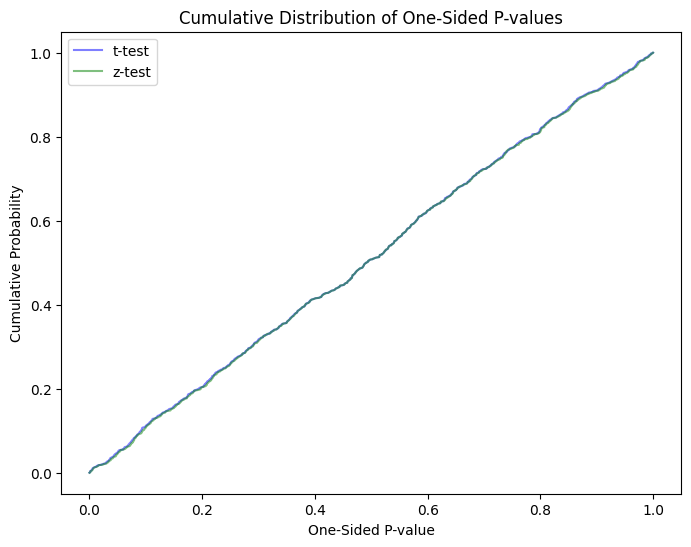

In [39]:
realizar_tests_y_graficar(estadistico_A, estadistico_B, n1, n2)

## p depende de la visita

## Por usuarios

### p no depende de la visita

In [40]:
p1 = 0.1
clicks_A = np.random.binomial(visitas_A, p1)
clicks_B = np.random.binomial(visitas_B, p1)

In [41]:
estadistico_A = clicks_A/n1
estadistico_B = clicks_B/n2

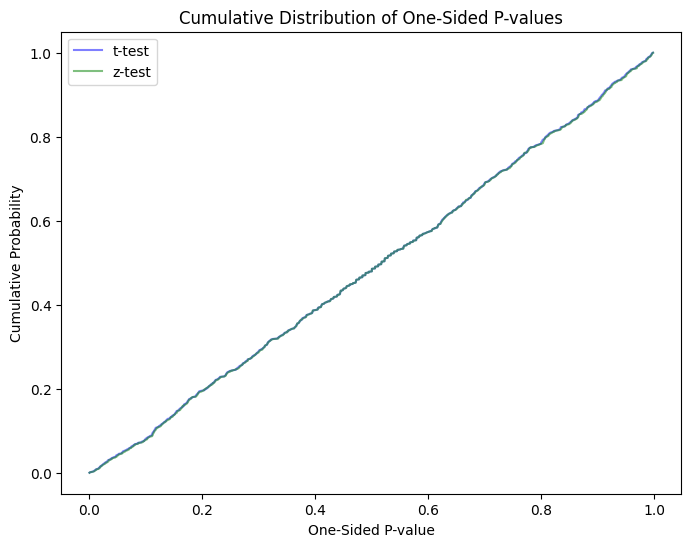

In [42]:
realizar_tests_y_graficar(estadistico_A, estadistico_B, n1, n2)

Tenemos que hacer simulaciones de un experimento y ver como nos dan los p valores (Uniformes o algo raro)

El experimento consta de 10k usuarios, cada uno pertenece al grupo A o al B segun una moneda.

Para cada usuario vamos a medir la cantidad de visitas que tuvieron a una pagina (Poisson con lambda=5) y ademas vamos a tener que cada usuario hace una cantidad de clicks de acuerdo a una binomial(0.1, #visitas)

Queremos medir de #clicks/#visitas

Tenemos que ver que pasa con los p valores si el parametro 0.1 (la probabilidad de exito por intento) dependiera de la cantidad de visitas.

Tambien en un segundo experimento tenemos que ver que pasa con el mismo experimento pero ahora mirando #usuarios que hicieron click/#usuarios. Sospecho que en las mismas condiciones pero no anote mas.